

# Project: Investigate a Dataset - [The Movie Database(TMDb)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
> For this project, I am going to be analyzing the Movie Database dataset which has 10866 rows. This dataset includes columns like 'cast' and 'genres', containing multiple values seperated by pipe(|) characters. The project has 3 parts : Data wrangling, Exploratory Data analysis and Conclusions.

### Dataset Description 

 This dataset has a total of 21 columns. The following are the names of the columns and their attributes:
 1. id - A unique identifier for each movie
 2. imdb - A unique identifier for each movie on IMDB
 3. popularity - A numeric quantity specifying how popular the movie is
 4. budget - The budget set for the movie
 5. revenue - The revenue generated by the movie
 6. original_title - The title of the movie
 7. cast - The names of the lead and supporting actors
 8. homepage - The link to the homepage of the movie
 9. director - The director of the movie
 10. tagline - The movie tagline
 11. keywords - The keywords related to the movie
 12. overview - A brief description of the movie
 13. runtime - Duration of the movie in minutes 
 14. genre - The genre of the movie
 15. production_companies - The production house of the movie
 16. release_date - The date on which the movie was released
 17. vote_count - The number of the vote ratings that the movie recieved
 18. vote_average - The average ratings that the movie recieved out of 10
 19. release_year -The year in which the movie was released 
 20. budget_adj - Shows the budget of the movie in terms of 2010 dollars
 21. revenue_adj - Shows the revenue of the movie in terms of the 2010 dollars
 The final two columns ending with "adj" indicate the budget and revenue associated with the movie
 in terms of 2010 dollars, accounting for inflation over time.


# Question(s) for Analysis

1. Which genres are most popular from year to year?
2. What movies have  the highest popularity and the lowest popularity?
3. What is the relationship between the budget of the movie and the revenue generated?

In [1]:
# importing all the necessary packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


In [2]:
#Loading the and viewing the first few rows of the dataset

df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
# Data Wrangling

> In this section, I am going to gather, assess and clean the data. 


### General Properties of the dataset

In [3]:
# showing the general information of the dataset to check data types and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Showing the descriptive statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# showing the number of rows and columns of the dataset
df.shape

(10866, 21)


## Data Cleaning
> This is where I check for null values, check the consistency of the data types of the columns,
handling zero values, replacing missing values, dropping duplicates and removing columns that are not needed for this analysis.

 

### Dropping columns that will not be needed for this investigation

In [6]:
# Removing the columns (imdb_id, id, cast, homepage, director, tagline, keywords, overview and production companies)
# that will not be used in the investigation

df.drop(columns=['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
#check the new number of rows and columns
df.shape

(10866, 13)

### Correcting zero values
fixing the zero values in the runtime, budget,revenue, budget_adj and revenue_adj columns as this may mean values were not recorded and may affect analysis.

In [8]:
# A function that replaces zero values with nan

def remove_zeros(data_frame, column_name):
    data_frame.loc[df[column_name] == 0, column_name] = np.nan

In [9]:
#replacing zero values in the selected columns with nan

remove_zeros(df, 'budget')
remove_zeros(df, 'budget_adj')
remove_zeros(df, 'revenue')
remove_zeros(df, 'revenue_adj')
remove_zeros(df, 'runtime')

In [10]:
#confirming the nan values
df.isna().any()

id                False
popularity        False
budget             True
revenue            True
original_title    False
runtime            True
genres             True
release_date      False
vote_count        False
vote_average      False
release_year      False
budget_adj         True
revenue_adj        True
dtype: bool

### Checking for null values, drop if any.

In [11]:
# Removing rows with null values
df.dropna(inplace=True)

In [12]:
#checking for any missing values
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### Drop duplicates

In [13]:
# Checking for duplicates and drop if any
df_dup = df.duplicated().sum()
df_dup

1

In [14]:
#drop duplicates and confirm 
df.drop_duplicates(inplace=True)
df.duplicated().sum() == 0

True

In [15]:
#check the date and time format 
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
#convert release_date to datetime format

df['release_date'] = pd.to_datetime(df['release_date'])

In [17]:
#check the new date format
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [18]:
# Seperating genres into multiple rows

df1 = pd.DataFrame(columns = df.columns)

for index in df.index: 
    movie = df.loc[index, :]
    for genre in movie["genres"].strip().split('|'):
        copy = movie.copy()
        copy["genres"] = genre
        df1 = pd.concat([df1, pd.DataFrame([copy])])

In [19]:
#Confirm seperated genres
df1["genres"].str.contains(pat = "^[a-zA-Z\s]+$", regex=True).all()

True

In [20]:
df1.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
# Exploratory Data Analysis



In [21]:
#Showing histogram overview of the dataset to see distribution
#initialising seaborn
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize': (14,14)})


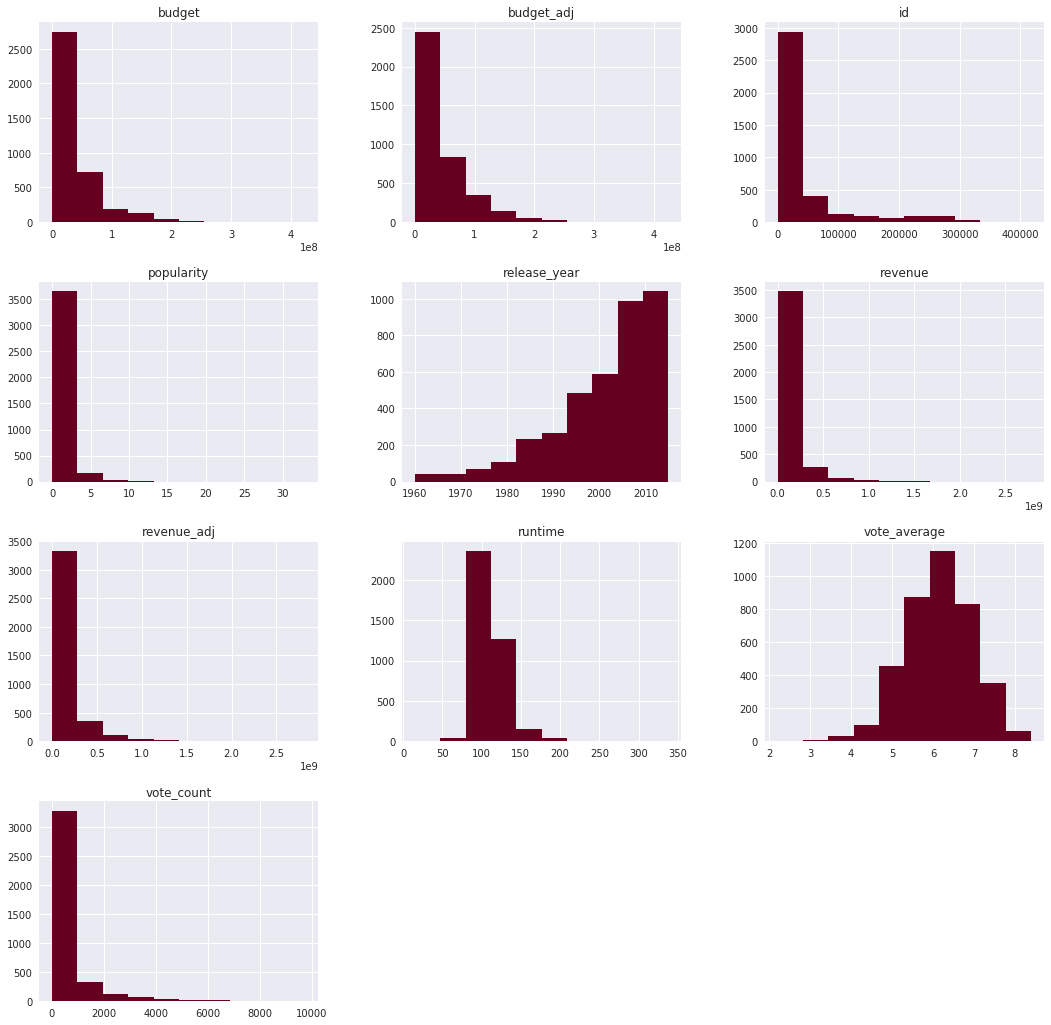

In [22]:
#histogram for various columns of the dataset
df.hist(figsize=[18,18], color='#650021');

## Brief summary of findings from the above visualizations:

* vote average has a normal disrtibution
* The run time of the majority of movies is less than 200 minutes
* More movies are released as the years increase

###  Question 1 - Which genres are most popular from year to year?

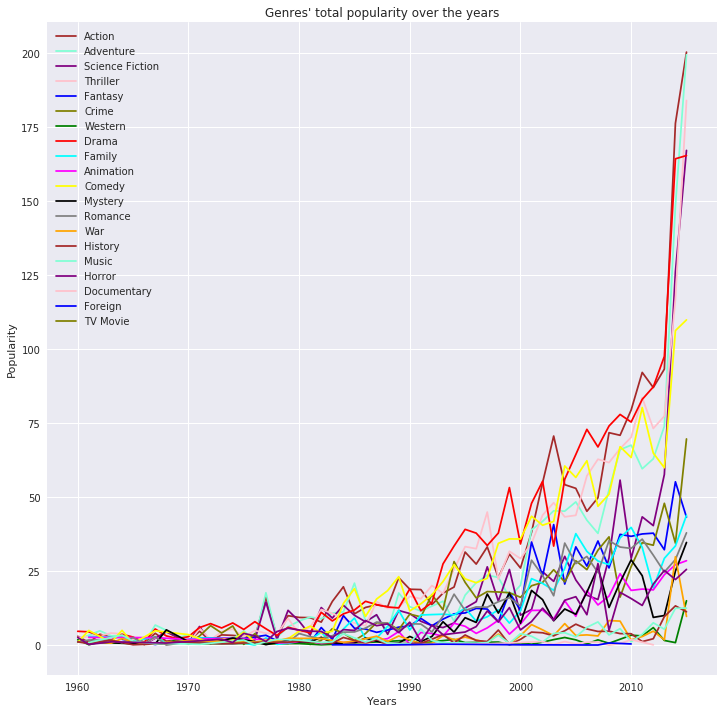

In [24]:
# Trends of genres' popularity over the years 
# Which genres are gaining popularity

genres = df1['genres'].unique()

colors = ['brown', 'aquamarine', 'purple','pink', 'blue','olive',
          'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'orange']      

# Plotting popularity over the years for genres
grouped = df1.groupby(['genres', 'release_year'])
plt.figure(figsize=(12, 12))
for i, genre in enumerate(genres):
    x = grouped['popularity'].sum()[genre].index
    y = grouped['popularity'].sum()[genre].values
    plt.plot(x, y, color=colors[i % len(colors)], label=genre)
    
plt.title('Genres\' total popularity over the years')
plt.xlabel('Years')
plt.ylabel('Popularity')
plt.legend()    
plt.show()


### Observation: 
* The multiline graph above is used to visualize the genre's popularity over time, to answer the question of the most popular genres. The graph shows that most genres gained popularity over time with the Top genres being: **Action, Adventure, Thriller, Drama and Comedy**

### Question 2 - What movies have the highest popularity and lowest popularity?

In [25]:
# The most popular movie(s)
df.query(f'popularity == {df["popularity"].max()}') 

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


### Observation :
* The above query was used to check for the most popular movie and from the output above, the most popular movie is : **Jurassic World**

In [26]:
# The least popular movie(s)
df.query(f'popularity == {df["popularity"].min()}')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7268,1392,0.001117,350000.0,3515061.0,Born into Brothels,85.0,Documentary,2004-12-08,23,6.4,2004,404055.889934,4.057946e+06


### Observation:
* The query above was used to check for the least popular movie, from the output above, the least popular movie is the **Born into Brothels** movie.

### Question 3 - What is the budget of the movie and the revenue generated? 

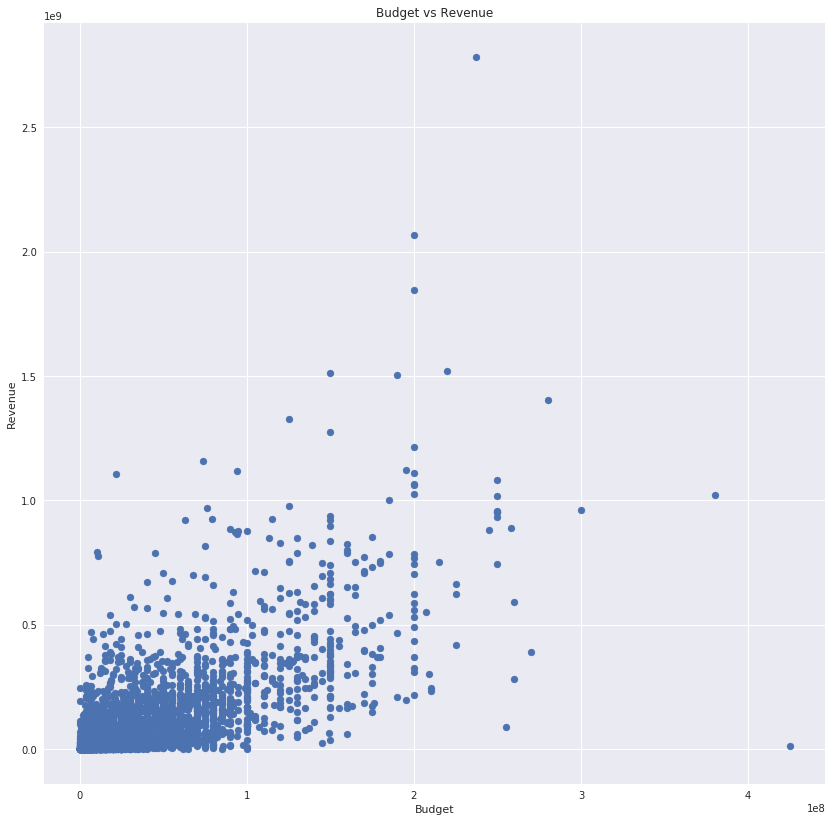

In [27]:
# Budget vs Revenue scatter plot
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue')
plt.show()

### observation:
* The scatter plot above of the varaibles - budget and revenue was used to test for the relationship and the correlation between the two variables. From this scatter plot visual, some linearity can be observed, it is seen that there is a positive correlation between the budget of the movie and the revenue generated by the movie. 

<a id='conclusions'></a>
# Conclusions
*The following are conclusions which were deduced from a thorough analysis of The Movie Database datase and through visualization*
* **The genres that have gained popularirty over the years are Action, Adventure, Thriller, Drama and comedy.**

* **The most popular movie - Jurassic World with a voute count of 5562**
* **The least popular movie - Born into Brothels with a vote count of 23**

* **A positive correlation exists between the budget and the revenue generated by the movie. Movies that recieve a greater budget yield more revenue.**

* **As the years increase, more movies are released**

* **Most of the movies have a runtime of less than 200 minutes**



## Limitations 
As a result of some missing values, and some columns dropped the data was limiting to some extent. This creates uncertainity and makes it hard to obtain completely accurate analysis. 
No advanced statistics was perfomed, results are therefore limited.

Some of the codes I used were from stackoverflow and geeks.com

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])